In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv("SuperMarket_Sales.csv")

print("Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nData Types:")
print(df.dtypes)
print("\nFirst 5 rows:")
df.head()

Shape: (1000, 17)

Column Names:
['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating']

Data Types:
Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Sales                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

First 5 rows:


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [2]:
print("Missing values per column:")
print(df.isnull().sum())
print("\n" + "="*50)
print("Total rows:", len(df))
print("Columns with missing data:", df.isnull().sum()[df.isnull().sum() > 0].count())

Missing values per column:
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Total rows: 1000
Columns with missing data: 0


In [3]:
print("Basic statistics for numerical columns:")
df.describe()

Basic statistics for numerical columns:


,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [4]:
print("Detailed dataset information:")
df.info()

Detailed dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64


In [5]:
# Convert Date from text to actual date format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Create new useful columns from the date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day
df['Day_of_Week'] = df['Date'].dt.day_name()

# Show the result
print("Date columns created successfully!")
print("\nSample of new columns:")
df[['Date', 'Year', 'Month', 'Month_Name', 'Day', 'Day_of_Week']].head()

Date columns created successfully!

Sample of new columns:


,Date,Year,Month,Month_Name,Day,Day_of_Week
0,2019-01-05,2019,1,January,5,Saturday
1,2019-03-08,2019,3,March,8,Friday
2,2019-03-03,2019,3,March,3,Sunday
3,2019-01-27,2019,1,January,27,Sunday
4,2019-02-08,2019,2,February,8,Friday


In [6]:
# Calculate total revenue (sum of all sales)
total_revenue = df['Sales'].sum()
total_transactions = len(df)
average_sale = df['Sales'].mean()

print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Transactions: {total_transactions:,}")
print(f"Average Sale Value: ${average_sale:,.2f}")
print(f"Date Range: {df['Date'].min()} to {df['Date'].max()}")

Total Revenue: $322,966.75
Total Transactions: 1,000
Average Sale Value: $322.97
Date Range: 2019-01-01 00:00:00 to 2019-03-30 00:00:00


In [7]:
print("Branches:", df['Branch'].unique())
print("Number of branches:", df['Branch'].nunique())
print()
print("Cities:", df['City'].unique())
print()
print("Product lines:", df['Product line'].unique())
print("Number of product lines:", df['Product line'].nunique())
print()
print("Payment methods:", df['Payment'].unique())

Branches: ['Alex' 'Giza' 'Cairo']
Number of branches: 3

Cities: ['Yangon' 'Naypyitaw' 'Mandalay']

Product lines: ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
Number of product lines: 6

Payment methods: ['Ewallet' 'Cash' 'Credit card']


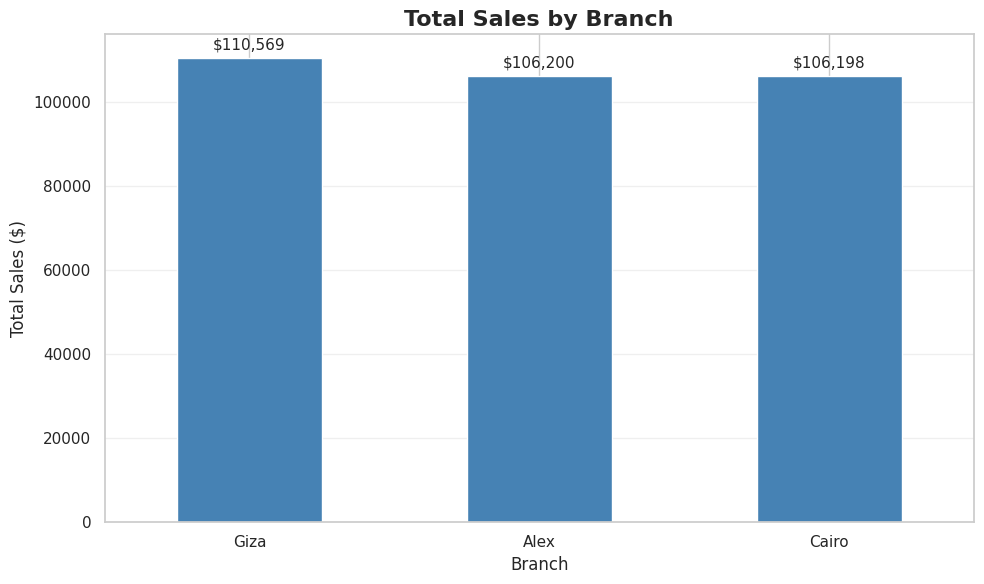


Sales by Branch:
Branch
Giza     110568.7065
Alex     106200.3705
Cairo    106197.6720
Name: Sales, dtype: float64


In [8]:
# Calculate total sales per branch
sales_by_branch = df.groupby('Branch')['Sales'].sum().sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
sales_by_branch.plot(kind='bar', color='steelblue')
plt.title('Total Sales by Branch', fontsize=16, fontweight='bold')
plt.xlabel('Branch', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for i, v in enumerate(sales_by_branch):
    plt.text(i, v + 2000, f'${v:,.0f}', ha='center', fontsize=11)

plt.tight_layout()
plt.show()

print("\nSales by Branch:")
print(sales_by_branch)

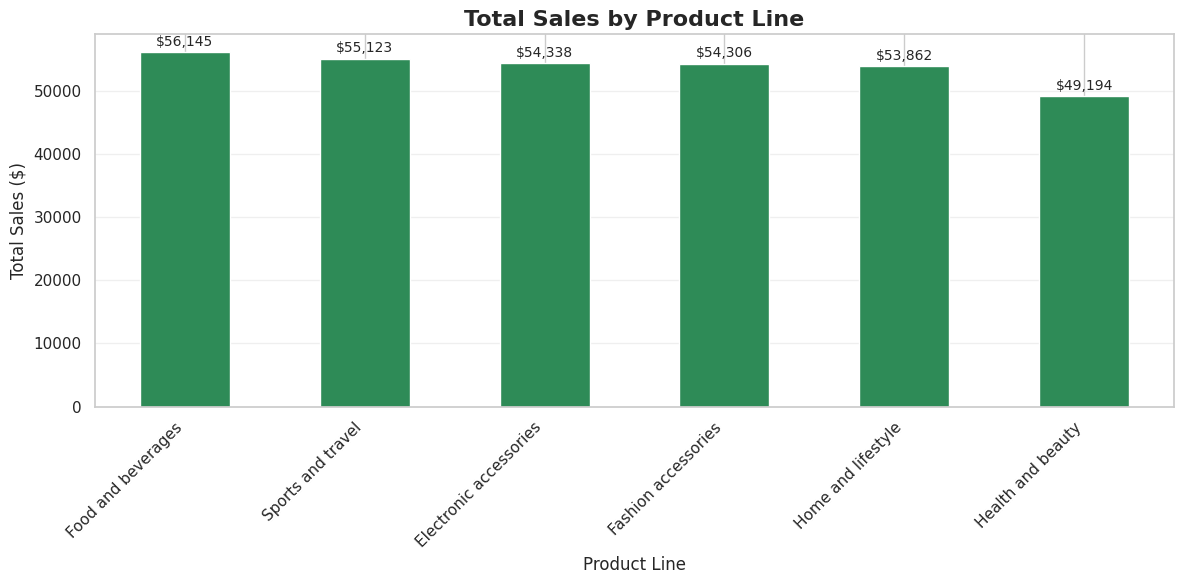


Sales by Product Line:
Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Sales, dtype: float64


In [9]:
# Calculate total sales per product line
sales_by_product = df.groupby('Product line')['Sales'].sum().sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 6))
sales_by_product.plot(kind='bar', color='seagreen')
plt.title('Total Sales by Product Line', fontsize=16, fontweight='bold')
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for i, v in enumerate(sales_by_product):
    plt.text(i, v + 1000, f'${v:,.0f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\nSales by Product Line:")
print(sales_by_product)

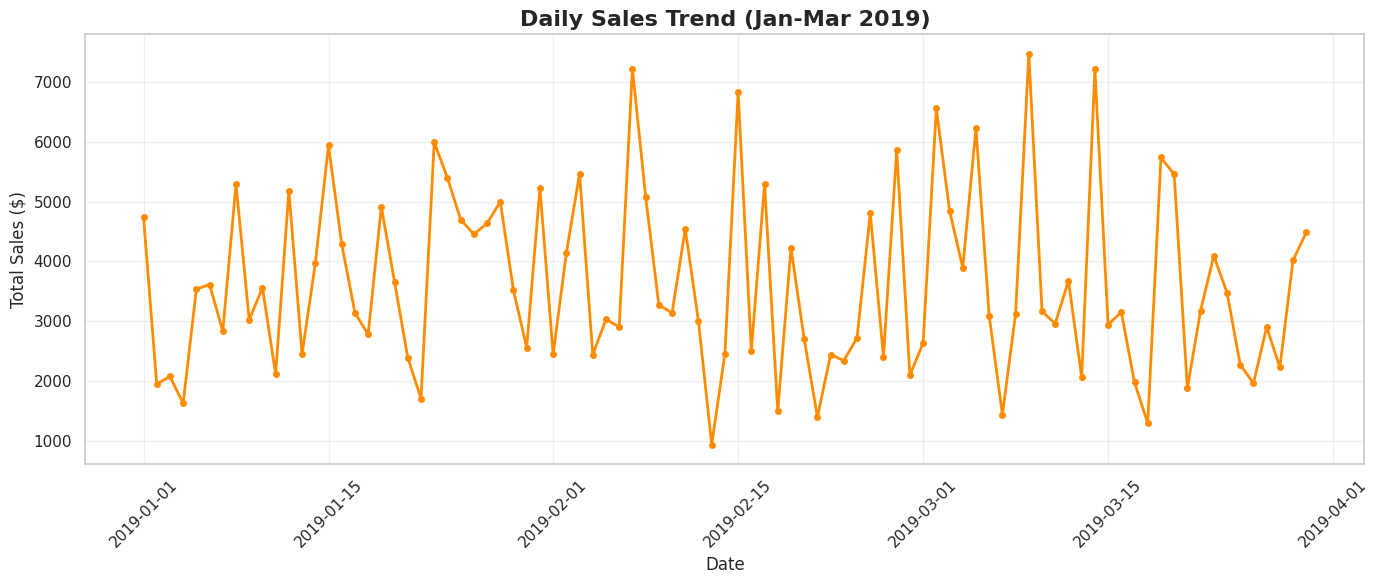


Highest sales day: 2019-03-09 00:00:00 with $7,474.05
Lowest sales day: 2019-02-13 00:00:00 with $934.24


In [10]:
# Calculate daily total sales
daily_sales = df.groupby('Date')['Sales'].sum().sort_index()

# Create the line chart
plt.figure(figsize=(14, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linewidth=2, markersize=4, color='darkorange')
plt.title('Daily Sales Trend (Jan-Mar 2019)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"\nHighest sales day: {daily_sales.idxmax()} with ${daily_sales.max():,.2f}")
print(f"Lowest sales day: {daily_sales.idxmin()} with ${daily_sales.min():,.2f}")

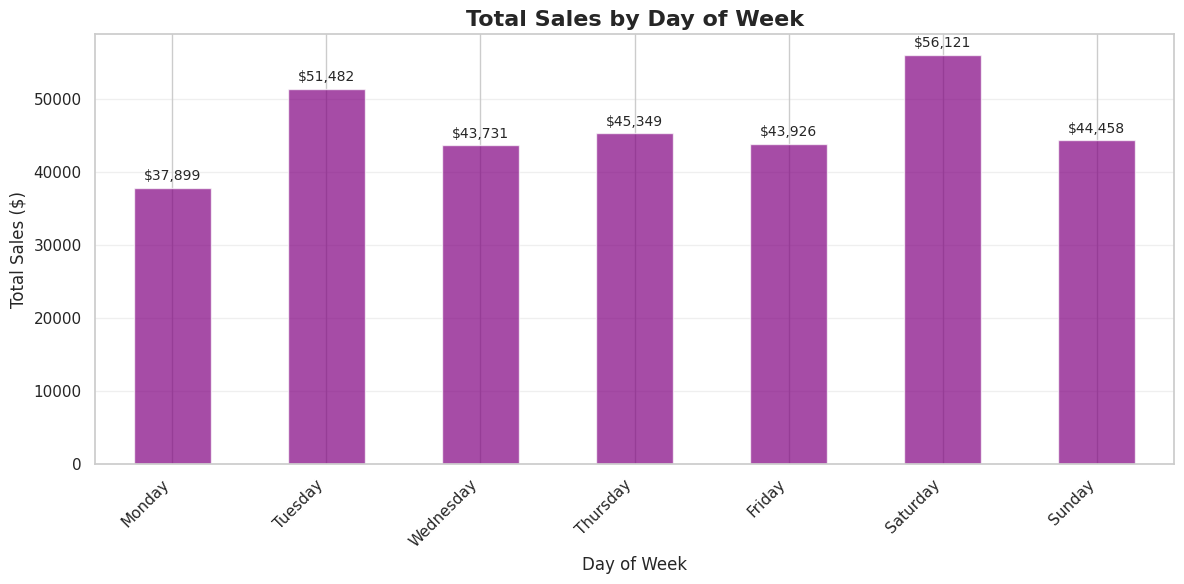


Sales by Day of Week:
Day_of_Week
Monday       37899.0780
Tuesday      51482.2455
Wednesday    43731.1350
Thursday     45349.2480
Friday       43926.3405
Saturday     56120.8095
Sunday       44457.8925
Name: Sales, dtype: float64


In [11]:
# Calculate total sales per day of week
sales_by_day = df.groupby('Day_of_Week')['Sales'].sum()

# Reorder days properly (Monday to Sunday)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day = sales_by_day.reindex(day_order)

# Create the bar chart
plt.figure(figsize=(12, 6))
sales_by_day.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Total Sales by Day of Week', fontsize=16, fontweight='bold')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for i, v in enumerate(sales_by_day):
    plt.text(i, v + 1000, f'${v:,.0f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\nSales by Day of Week:")
print(sales_by_day)

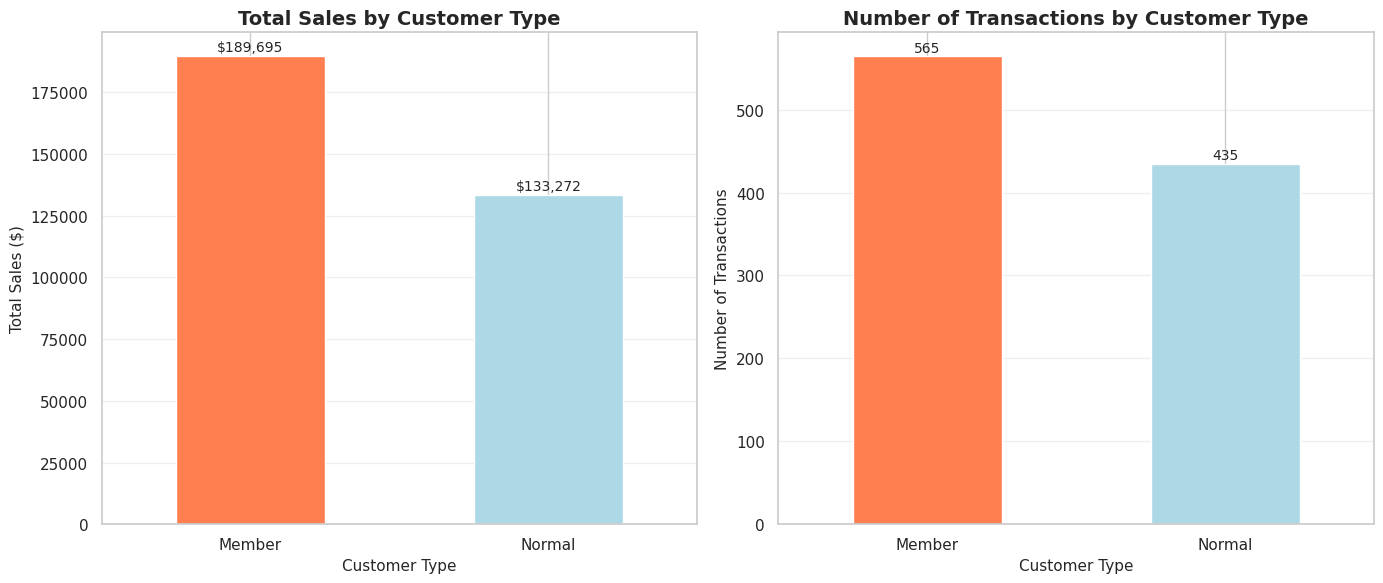


Sales by Customer Type:
Customer type
Member    189694.764
Normal    133271.985
Name: Sales, dtype: float64

Transactions by Customer Type:
Customer type
Member    565
Normal    435
dtype: int64

Average sale per customer type:
Customer type
Member    335.742945
Normal    306.372379
Name: Sales, dtype: float64


In [12]:
# Calculate sales by customer type
sales_by_customer = df.groupby('Customer type')['Sales'].sum().sort_values(ascending=False)
count_by_customer = df.groupby('Customer type').size()

# Create side-by-side comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Chart 1: Total sales
sales_by_customer.plot(kind='bar', ax=ax1, color=['coral', 'lightblue'])
ax1.set_title('Total Sales by Customer Type', fontsize=14, fontweight='bold')
ax1.set_xlabel('Customer Type', fontsize=11)
ax1.set_ylabel('Total Sales ($)', fontsize=11)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(sales_by_customer):
    ax1.text(i, v + 2000, f'${v:,.0f}', ha='center', fontsize=10)

# Chart 2: Number of transactions
count_by_customer.plot(kind='bar', ax=ax2, color=['coral', 'lightblue'])
ax2.set_title('Number of Transactions by Customer Type', fontsize=14, fontweight='bold')
ax2.set_xlabel('Customer Type', fontsize=11)
ax2.set_ylabel('Number of Transactions', fontsize=11)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(count_by_customer):
    ax2.text(i, v + 5, f'{v}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\nSales by Customer Type:")
print(sales_by_customer)
print("\nTransactions by Customer Type:")
print(count_by_customer)
print("\nAverage sale per customer type:")
print(df.groupby('Customer type')['Sales'].mean())

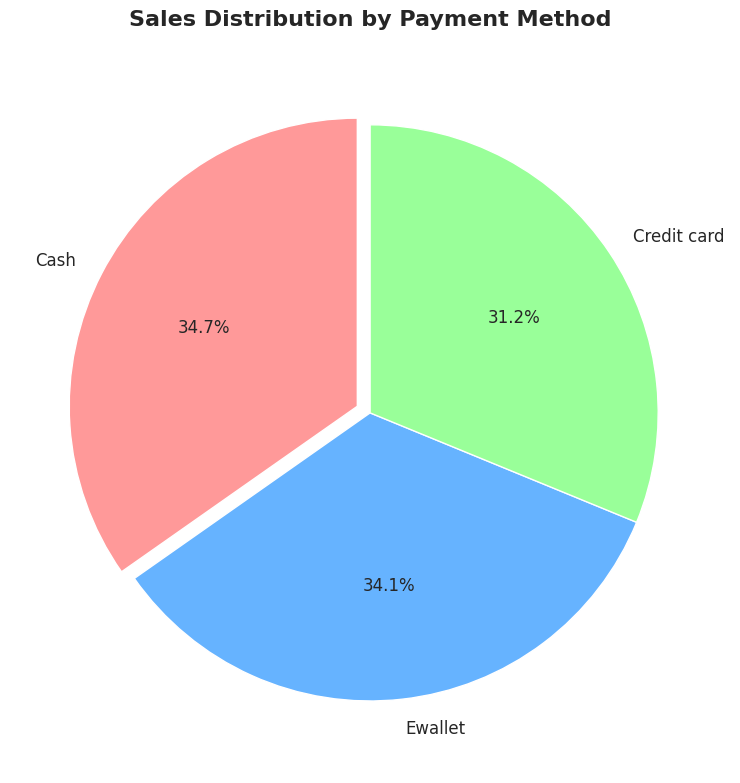


Sales by Payment Method:
Payment
Cash           112206.570
Ewallet        109993.107
Credit card    100767.072
Name: Sales, dtype: float64

Total: $322,966.75


In [13]:
# Calculate sales by payment method
sales_by_payment = df.groupby('Payment')['Sales'].sum().sort_values(ascending=False)

# Create pie chart
plt.figure(figsize=(10, 8))
colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = (0.05, 0, 0)  # Slightly separate the largest slice

plt.pie(sales_by_payment, labels=sales_by_payment.index, autopct='%1.1f%%', 
        startangle=90, colors=colors, explode=explode, textprops={'fontsize': 12})
plt.title('Sales Distribution by Payment Method', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("\nSales by Payment Method:")
print(sales_by_payment)
print(f"\nTotal: ${sales_by_payment.sum():,.2f}")

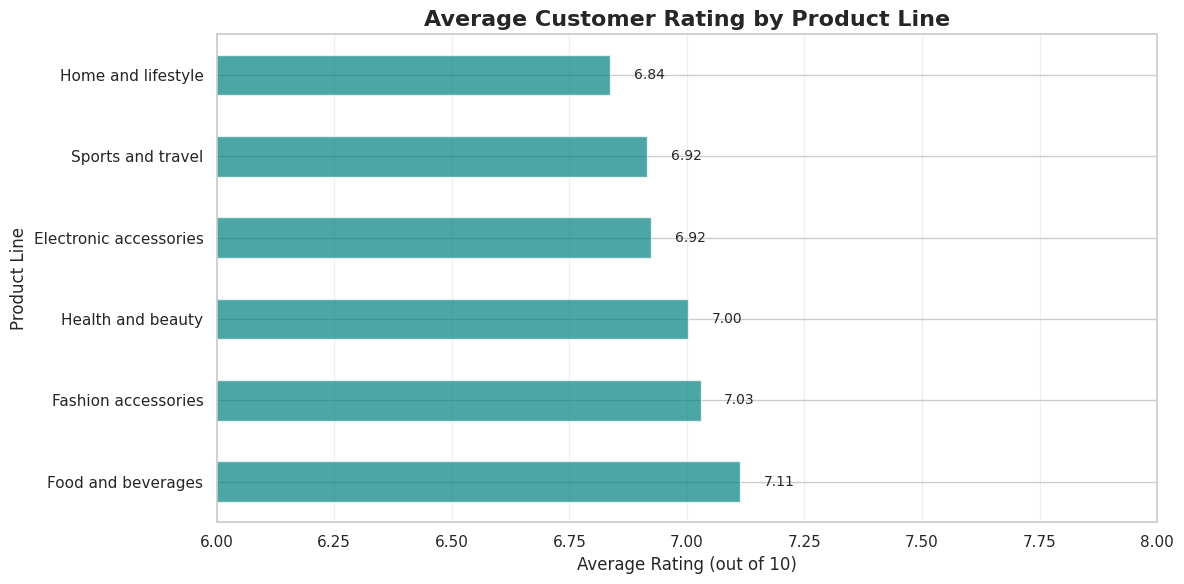


Average Rating by Product Line:
Product line
Food and beverages        7.113218
Fashion accessories       7.029213
Health and beauty         7.003289
Electronic accessories    6.924706
Sports and travel         6.916265
Home and lifestyle        6.837500
Name: Rating, dtype: float64

Overall average rating: 6.97


In [14]:
# Calculate average rating per product line
rating_by_product = df.groupby('Product line')['Rating'].mean().sort_values(ascending=False)

# Create horizontal bar chart
plt.figure(figsize=(12, 6))
rating_by_product.plot(kind='barh', color='teal', alpha=0.7)
plt.title('Average Customer Rating by Product Line', fontsize=16, fontweight='bold')
plt.xlabel('Average Rating (out of 10)', fontsize=12)
plt.ylabel('Product Line', fontsize=12)
plt.xlim(6, 8)  # Focus on the relevant range
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(rating_by_product):
    plt.text(v + 0.05, i, f'{v:.2f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\nAverage Rating by Product Line:")
print(rating_by_product)
print(f"\nOverall average rating: {df['Rating'].mean():.2f}")

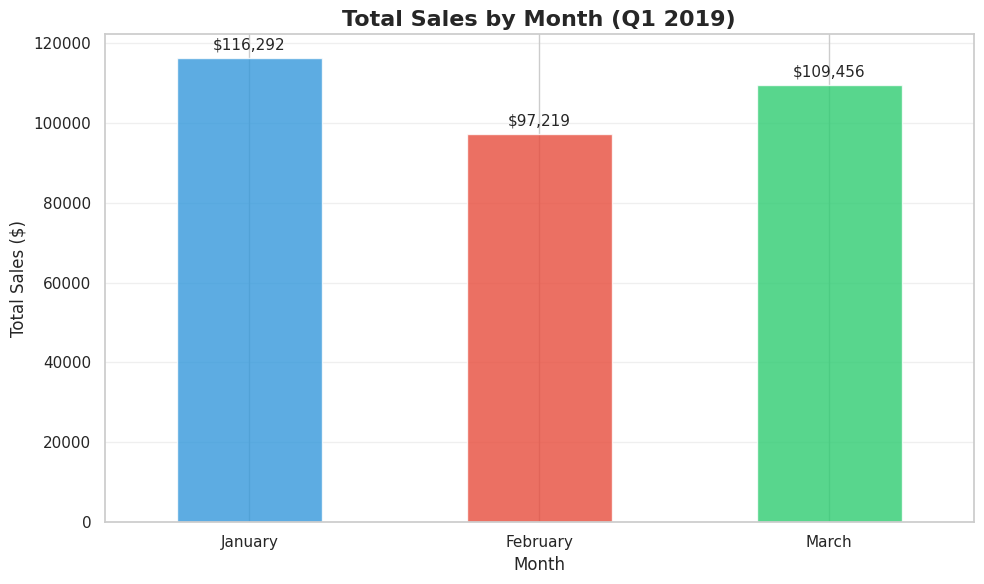


Sales by Month:
Month_Name
January     116291.868
February     97219.374
March       109455.507
Name: Sales, dtype: float64

Growth from Jan to Mar: -5.9%


In [15]:
# Calculate sales by month
monthly_sales = df.groupby('Month_Name')['Sales'].sum()

# Reorder months properly
month_order = ['January', 'February', 'March']
monthly_sales = monthly_sales.reindex(month_order)

# Create bar chart
plt.figure(figsize=(10, 6))
colors_months = ['#3498db', '#e74c3c', '#2ecc71']
monthly_sales.plot(kind='bar', color=colors_months, alpha=0.8)
plt.title('Total Sales by Month (Q1 2019)', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(monthly_sales):
    plt.text(i, v + 2000, f'${v:,.0f}', ha='center', fontsize=11)

plt.tight_layout()
plt.show()

print("\nSales by Month:")
print(monthly_sales)
print(f"\nGrowth from Jan to Mar: {((monthly_sales['March'] - monthly_sales['January']) / monthly_sales['January'] * 100):.1f}%")

In [16]:
# Get top 10 sales
top_sales = df.nlargest(10, 'Sales')[['Invoice ID', 'Branch', 'Product line', 'Quantity', 'Sales', 'Date', 'Customer type']]

print("Top 10 Highest Sales Transactions:\n")
print(top_sales.to_string(index=False))
print(f"\nTotal from top 10: ${top_sales['Sales'].sum():,.2f}")
print(f"Percentage of total revenue: {(top_sales['Sales'].sum() / df['Sales'].sum() * 100):.2f}%")

Top 10 Highest Sales Transactions:

 Invoice ID Branch        Product line  Quantity    Sales       Date Customer type
860-79-0874   Giza Fashion accessories        10 1042.650 2019-02-15        Member
687-47-8271   Alex Fashion accessories        10 1039.290 2019-02-08        Normal
283-26-5248   Giza  Food and beverages        10 1034.460 2019-01-30        Member
751-41-9720   Giza  Home and lifestyle        10 1023.750 2019-01-12        Normal
303-96-2227  Cairo  Home and lifestyle        10 1022.490 2019-03-02        Normal
744-16-7898  Cairo  Home and lifestyle        10 1022.385 2019-01-15        Normal
271-88-8734   Giza Fashion accessories        10 1020.705 2019-02-08        Member
234-65-2137   Giza  Home and lifestyle        10 1003.590 2019-01-16        Normal
554-42-2417   Giza   Sports and travel        10 1002.120 2019-01-09        Normal
325-77-6186   Alex  Home and lifestyle        10  951.825 2019-03-08        Member

Total from top 10: $10,163.27
Percentage of total 

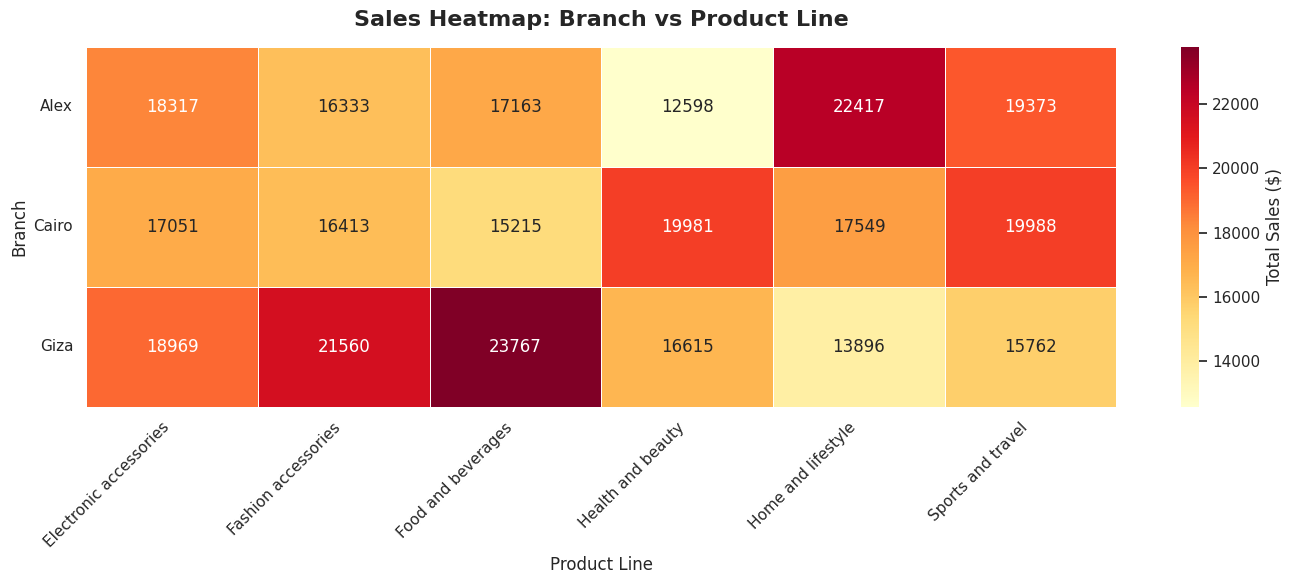


Sales by Branch and Product Line:
Product line  Electronic accessories  Fashion accessories  Food and beverages  \
Branch                                                                          
Alex                      18317.1135           16332.5085          17163.1005   
Cairo                     17051.4435           16413.3165          15214.8885   
Giza                      18968.9745           21560.0700          23766.8550   

Product line  Health and beauty  Home and lifestyle  Sports and travel  
Branch                                                                  
Alex                  12597.753          22417.1955         19372.6995  
Cairo                 19980.660          17549.1645         19988.1990  
Giza                  16615.326          13895.5530         15761.9280  


In [17]:
# Create a pivot table: branches as rows, product lines as columns
sales_heatmap = df.pivot_table(values='Sales', index='Branch', columns='Product line', aggfunc='sum')

# Create the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(sales_heatmap, annot=True, fmt='.0f', cmap='YlOrRd', linewidths=0.5, cbar_kws={'label': 'Total Sales ($)'})
plt.title('Sales Heatmap: Branch vs Product Line', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Branch', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nSales by Branch and Product Line:")
print(sales_heatmap)

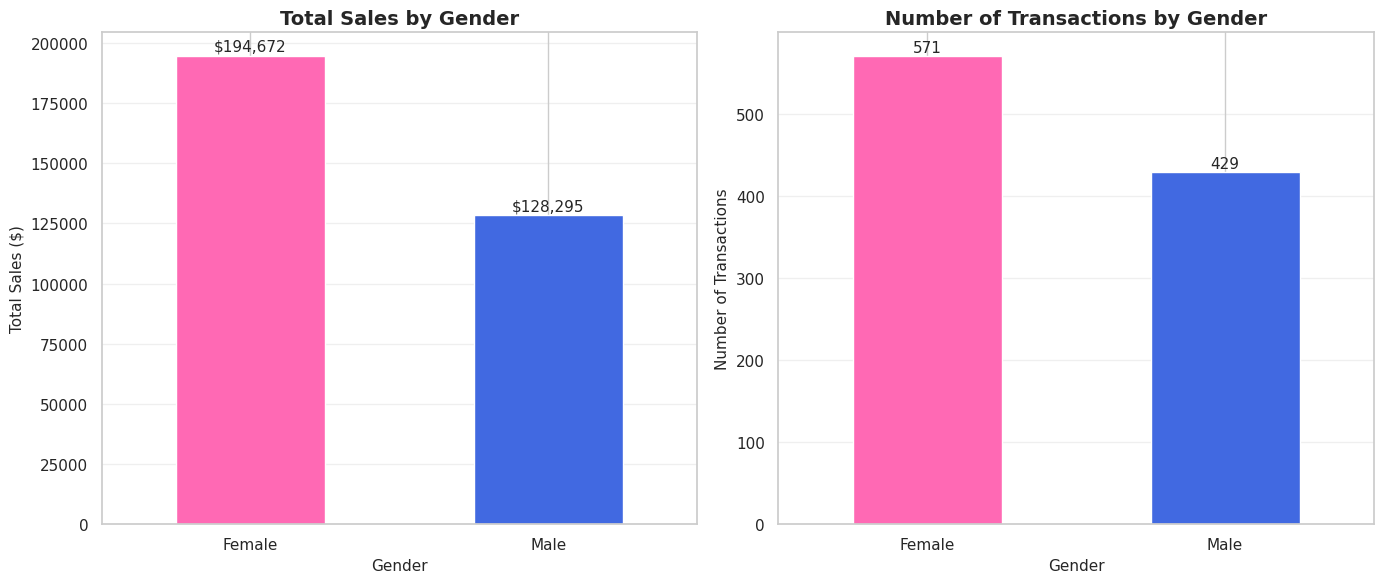


Sales by Gender:
Gender
Female    194671.8375
Male      128294.9115
Name: Sales, dtype: float64

Transactions by Gender:
Gender
Female    571
Male      429
dtype: int64

Average sale - Female: $340.93
Average sale - Male: $299.06


In [18]:
# Calculate sales by gender
sales_by_gender = df.groupby('Gender')['Sales'].sum()
count_by_gender = df.groupby('Gender').size()

# Create side-by-side comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Chart 1: Total sales by gender
sales_by_gender.plot(kind='bar', ax=ax1, color=['#FF69B4', '#4169E1'])
ax1.set_title('Total Sales by Gender', fontsize=14, fontweight='bold')
ax1.set_xlabel('Gender', fontsize=11)
ax1.set_ylabel('Total Sales ($)', fontsize=11)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.grid(axis='y', alpha=0.3)

for i, v in enumerate(sales_by_gender):
    ax1.text(i, v + 2000, f'${v:,.0f}', ha='center', fontsize=11)

# Chart 2: Number of transactions by gender
count_by_gender.plot(kind='bar', ax=ax2, color=['#FF69B4', '#4169E1'])
ax2.set_title('Number of Transactions by Gender', fontsize=14, fontweight='bold')
ax2.set_xlabel('Gender', fontsize=11)
ax2.set_ylabel('Number of Transactions', fontsize=11)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.grid(axis='y', alpha=0.3)

for i, v in enumerate(count_by_gender):
    ax2.text(i, v + 5, f'{v}', ha='center', fontsize=11)

plt.tight_layout()
plt.show()

print("\nSales by Gender:")
print(sales_by_gender)
print("\nTransactions by Gender:")
print(count_by_gender)
print(f"\nAverage sale - Female: ${df[df['Gender']=='Female']['Sales'].mean():.2f}")
print(f"Average sale - Male: ${df[df['Gender']=='Male']['Sales'].mean():.2f}")

<Figure size 1400x700 with 0 Axes>

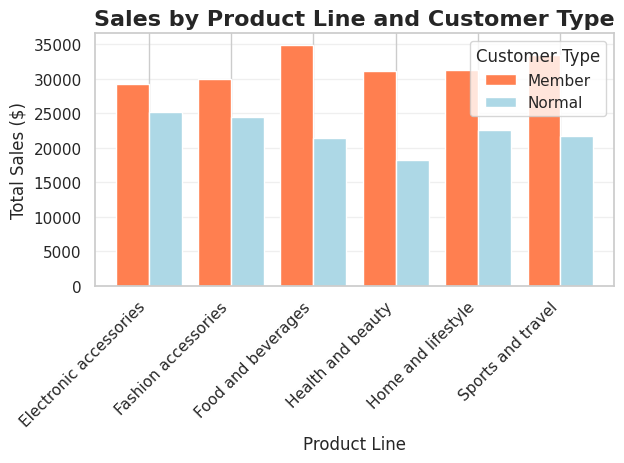


Sales by Product Line and Customer Type:
Customer type               Member      Normal
Product line                                  
Electronic accessories  29194.7565  25142.7750
Fashion accessories     29926.5645  24379.3305
Food and beverages      34822.3890  21322.4550
Health and beauty       31036.8240  18156.9150
Home and lifestyle      31317.2790  22544.6340
Sports and travel       33396.9510  21725.8755


In [19]:
# Create a grouped bar chart
product_customer = df.groupby(['Product line', 'Customer type'])['Sales'].sum().unstack()

# Create the chart
plt.figure(figsize=(14, 7))
product_customer.plot(kind='bar', width=0.8, color=['coral', 'lightblue'])
plt.title('Sales by Product Line and Customer Type', fontsize=16, fontweight='bold')
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Customer Type', fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nSales by Product Line and Customer Type:")
print(product_customer)

In [20]:
print("="*70)
print(" "*15 + "SUPERMARKET SALES ANALYSIS REPORT")
print(" "*20 + "Q1 2019 (Jan - Mar)")
print("="*70)

print("\n📊 OVERALL PERFORMANCE")
print("-" * 70)
print(f"Total Revenue:           ${df['Sales'].sum():,.2f}")
print(f"Total Transactions:      {len(df):,}")
print(f"Average Transaction:     ${df['Sales'].mean():.2f}")
print(f"Date Range:              {df['Date'].min().strftime('%B %d, %Y')} to {df['Date'].max().strftime('%B %d, %Y')}")

print("\n🏆 TOP PERFORMERS")
print("-" * 70)
top_branch = df.groupby('Branch')['Sales'].sum().idxmax()
print(f"Best Branch:             {top_branch} (${df.groupby('Branch')['Sales'].sum().max():,.2f})")

top_product = df.groupby('Product line')['Sales'].sum().idxmax()
print(f"Best Product Line:       {top_product} (${df.groupby('Product line')['Sales'].sum().max():,.2f})")

top_day = df.groupby('Day_of_Week')['Sales'].sum().idxmax()
print(f"Busiest Day:             {top_day}")

best_rated = df.groupby('Product line')['Rating'].mean().idxmax()
print(f"Highest Rated Product:   {best_rated} ({df.groupby('Product line')['Rating'].mean().max():.2f}/10)")

print("\n👥 CUSTOMER INSIGHTS")
print("-" * 70)
member_sales = df[df['Customer type']=='Member']['Sales'].sum()
normal_sales = df[df['Customer type']=='Normal']['Sales'].sum()
print(f"Member Sales:            ${member_sales:,.2f} ({member_sales/df['Sales'].sum()*100:.1f}%)")
print(f"Normal Sales:            ${normal_sales:,.2f} ({normal_sales/df['Sales'].sum()*100:.1f}%)")
print(f"Member Avg Transaction:  ${df[df['Customer type']=='Member']['Sales'].mean():.2f}")
print(f"Normal Avg Transaction:  ${df[df['Customer type']=='Normal']['Sales'].mean():.2f}")

print("\n💳 PAYMENT PREFERENCES")
print("-" * 70)
for payment in df['Payment'].unique():
    payment_total = df[df['Payment']==payment]['Sales'].sum()
    payment_pct = payment_total / df['Sales'].sum() * 100
    print(f"{payment:20} ${payment_total:>10,.2f} ({payment_pct:>5.1f}%)")

print("\n📈 MONTHLY BREAKDOWN")
print("-" * 70)
for month in ['January', 'February', 'March']:
    if month in df['Month_Name'].values:
        month_sales = df[df['Month_Name']==month]['Sales'].sum()
        month_trans = len(df[df['Month_Name']==month])
        print(f"{month:15} ${month_sales:>10,.2f} ({month_trans:>4} transactions)")

print("\n⭐ CUSTOMER SATISFACTION")
print("-" * 70)
print(f"Overall Avg Rating:      {df['Rating'].mean():.2f}/10")
print(f"Highest Rating:          {df['Rating'].max():.1f}/10")
print(f"Lowest Rating:           {df['Rating'].min():.1f}/10")

print("\n" + "="*70)
print(" "*22 + "END OF REPORT")
print("="*70)

               SUPERMARKET SALES ANALYSIS REPORT
                    Q1 2019 (Jan - Mar)

📊 OVERALL PERFORMANCE
----------------------------------------------------------------------
Total Revenue:           $322,966.75
Total Transactions:      1,000
Average Transaction:     $322.97
Date Range:              January 01, 2019 to March 30, 2019

🏆 TOP PERFORMERS
----------------------------------------------------------------------
Best Branch:             Giza ($110,568.71)
Best Product Line:       Food and beverages ($56,144.84)
Busiest Day:             Saturday
Highest Rated Product:   Food and beverages (7.11/10)

👥 CUSTOMER INSIGHTS
----------------------------------------------------------------------
Member Sales:            $189,694.76 (58.7%)
Normal Sales:            $133,271.98 (41.3%)
Member Avg Transaction:  $335.74
Normal Avg Transaction:  $306.37

💳 PAYMENT PREFERENCES
----------------------------------------------------------------------
Ewallet              $109,993.11 ( 3

In [21]:
# Save cleaned data with new columns
df.to_csv('SuperMarket_Sales_Analyzed.csv', index=False)
print("✅ Cleaned and analyzed data saved as 'SuperMarket_Sales_Analyzed.csv'")

# Create a summary statistics file
summary = {
    'Metric': [
        'Total Revenue',
        'Total Transactions',
        'Average Sale',
        'Top Branch',
        'Top Product',
        'Best Day',
        'Most Popular Payment'
    ],
    'Value': [
        f"${df['Sales'].sum():,.2f}",
        f"{len(df):,}",
        f"${df['Sales'].mean():.2f}",
        df.groupby('Branch')['Sales'].sum().idxmax(),
        df.groupby('Product line')['Sales'].sum().idxmax(),
        df.groupby('Day_of_Week')['Sales'].sum().idxmax(),
        df.groupby('Payment')['Sales'].sum().idxmax()
    ]
}

summary_df = pd.DataFrame(summary)
summary_df.to_csv('Sales_Summary.csv', index=False)
print("✅ Summary report saved as 'Sales_Summary.csv'")

print("\n📁 Files created in your repository:")
print("   1. SuperMarket_Sales_Analyzed.csv (full data with new columns)")
print("   2. Sales_Summary.csv (key metrics summary)")

✅ Cleaned and analyzed data saved as 'SuperMarket_Sales_Analyzed.csv'
✅ Summary report saved as 'Sales_Summary.csv'

📁 Files created in your repository:
   1. SuperMarket_Sales_Analyzed.csv (full data with new columns)
   2. Sales_Summary.csv (key metrics summary)


In [22]:
# Quick check
print(f"Data loaded: {len(df)} rows")
print(f"Columns: {df.columns.tolist()[:5]}...")  # Show first 5 columns

Data loaded: 1000 rows
Columns: ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender']...


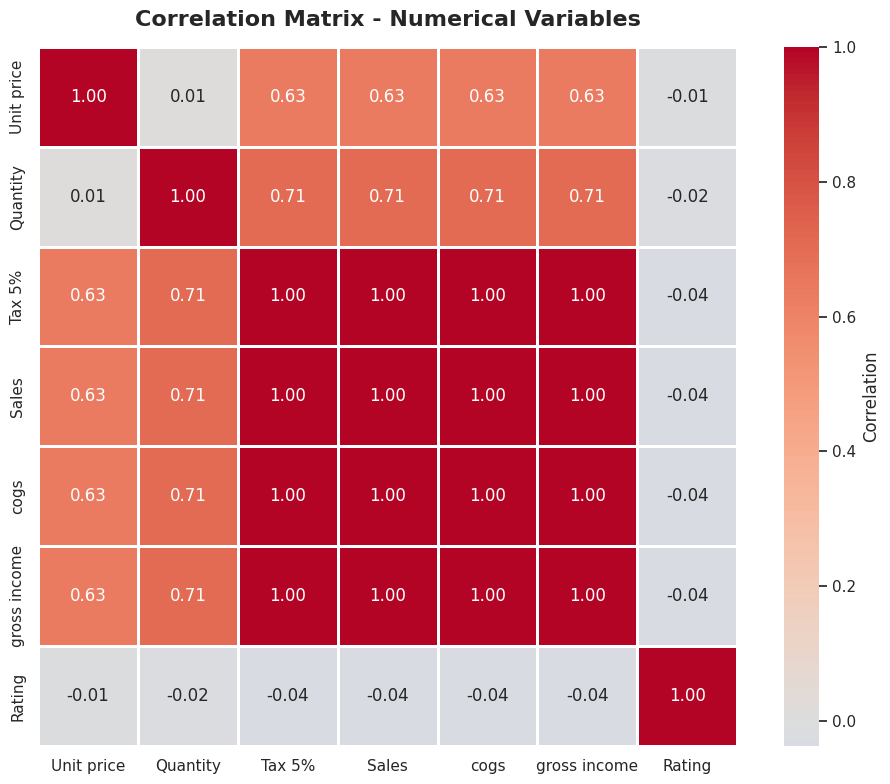


Correlation Matrix:
              Unit price  Quantity    Tax 5%     Sales      cogs  \
Unit price      1.000000  0.010778  0.633962  0.633962  0.633962   
Quantity        0.010778  1.000000  0.705510  0.705510  0.705510   
Tax 5%          0.633962  0.705510  1.000000  1.000000  1.000000   
Sales           0.633962  0.705510  1.000000  1.000000  1.000000   
cogs            0.633962  0.705510  1.000000  1.000000  1.000000   
gross income    0.633962  0.705510  1.000000  1.000000  1.000000   
Rating         -0.008778 -0.015815 -0.036442 -0.036442 -0.036442   

              gross income    Rating  
Unit price        0.633962 -0.008778  
Quantity          0.705510 -0.015815  
Tax 5%            1.000000 -0.036442  
Sales             1.000000 -0.036442  
cogs              1.000000 -0.036442  
gross income      1.000000 -0.036442  
Rating           -0.036442  1.000000  

💡 How to read this:
   1.0 = Perfect positive correlation
   0.0 = No correlation
  -1.0 = Perfect negative correlation


In [23]:
# Cell 22: Correlation Analysis - Which factors are related?

# Select only numerical columns for correlation
numerical_cols = ['Unit price', 'Quantity', 'Tax 5%', 'Sales', 'cogs', 'gross income', 'Rating']
correlation_matrix = df[numerical_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, linewidths=1, square=True, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix - Numerical Variables', fontsize=16, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()

print("\nCorrelation Matrix:")
print(correlation_matrix)
print("\n💡 How to read this:")
print("   1.0 = Perfect positive correlation")
print("   0.0 = No correlation")
print("  -1.0 = Perfect negative correlation")

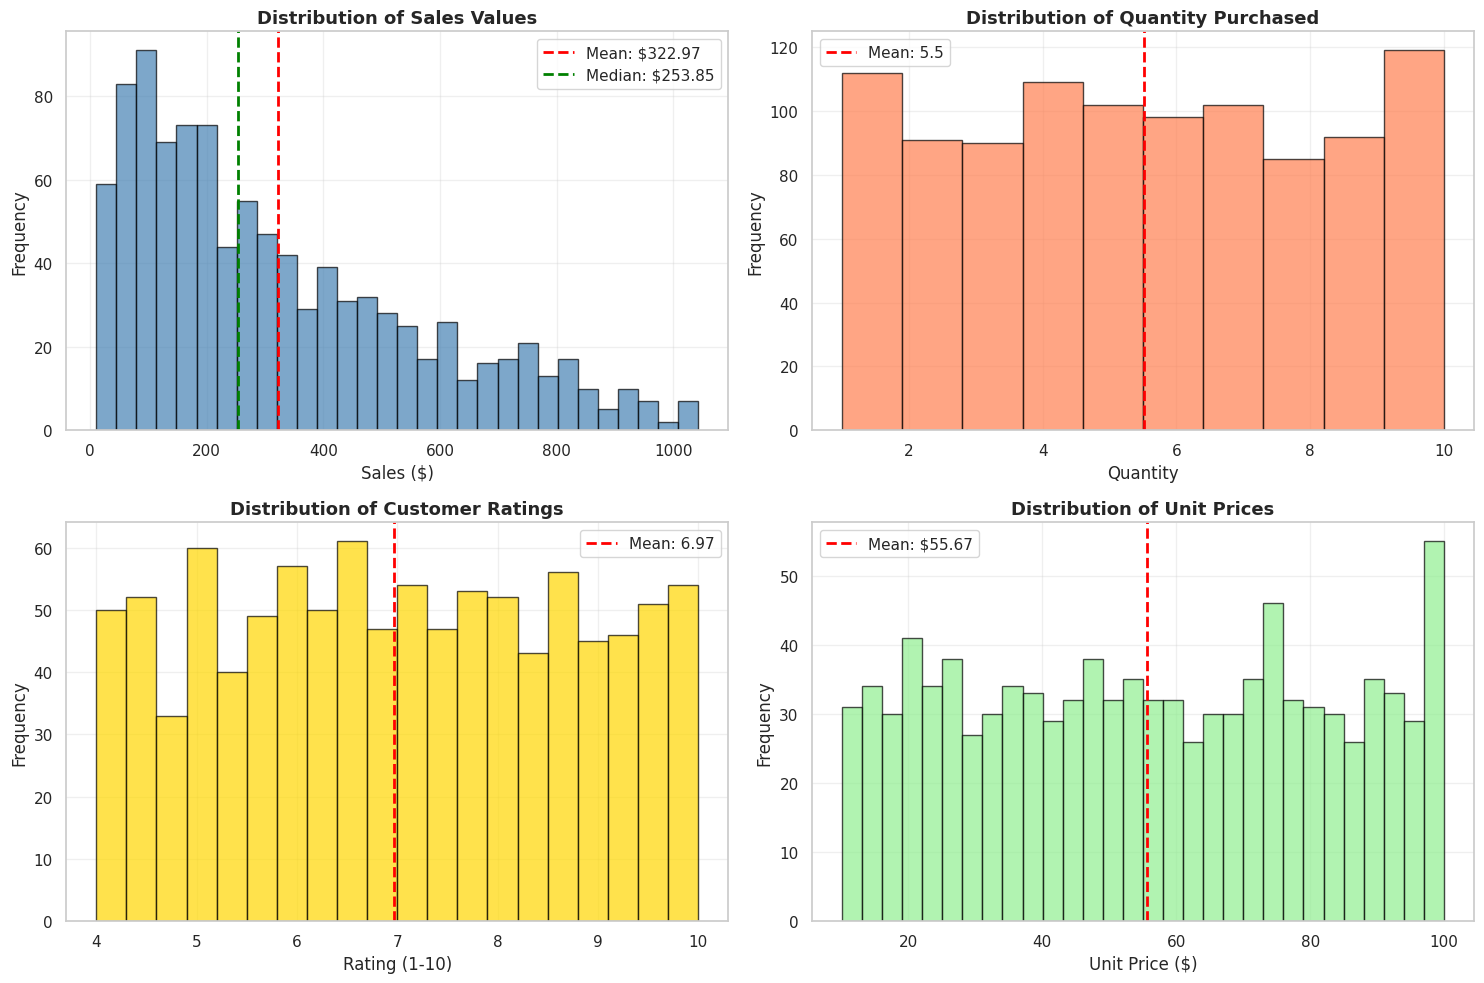


📊 Sales Statistics:
   Mean (average):     $322.97
   Median (middle):    $253.85
   Mode (most common): $87.23
   Std Dev (spread):   $245.89


In [24]:
# Cell 23: Distribution Analysis - Understanding Sales Patterns

# Create multiple distribution plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Sales distribution
axes[0, 0].hist(df['Sales'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['Sales'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${df["Sales"].mean():.2f}')
axes[0, 0].axvline(df['Sales'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: ${df["Sales"].median():.2f}')
axes[0, 0].set_title('Distribution of Sales Values', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Sales ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Quantity distribution
axes[0, 1].hist(df['Quantity'], bins=10, color='coral', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(df['Quantity'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Quantity"].mean():.1f}')
axes[0, 1].set_title('Distribution of Quantity Purchased', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Quantity')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Rating distribution
axes[1, 0].hist(df['Rating'], bins=20, color='gold', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(df['Rating'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Rating"].mean():.2f}')
axes[1, 0].set_title('Distribution of Customer Ratings', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Rating (1-10)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 4. Unit price distribution
axes[1, 1].hist(df['Unit price'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 1].axvline(df['Unit price'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${df["Unit price"].mean():.2f}')
axes[1, 1].set_title('Distribution of Unit Prices', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Unit Price ($)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Sales Statistics:")
print(f"   Mean (average):     ${df['Sales'].mean():.2f}")
print(f"   Median (middle):    ${df['Sales'].median():.2f}")
print(f"   Mode (most common): ${df['Sales'].mode()[0]:.2f}")
print(f"   Std Dev (spread):   ${df['Sales'].std():.2f}")

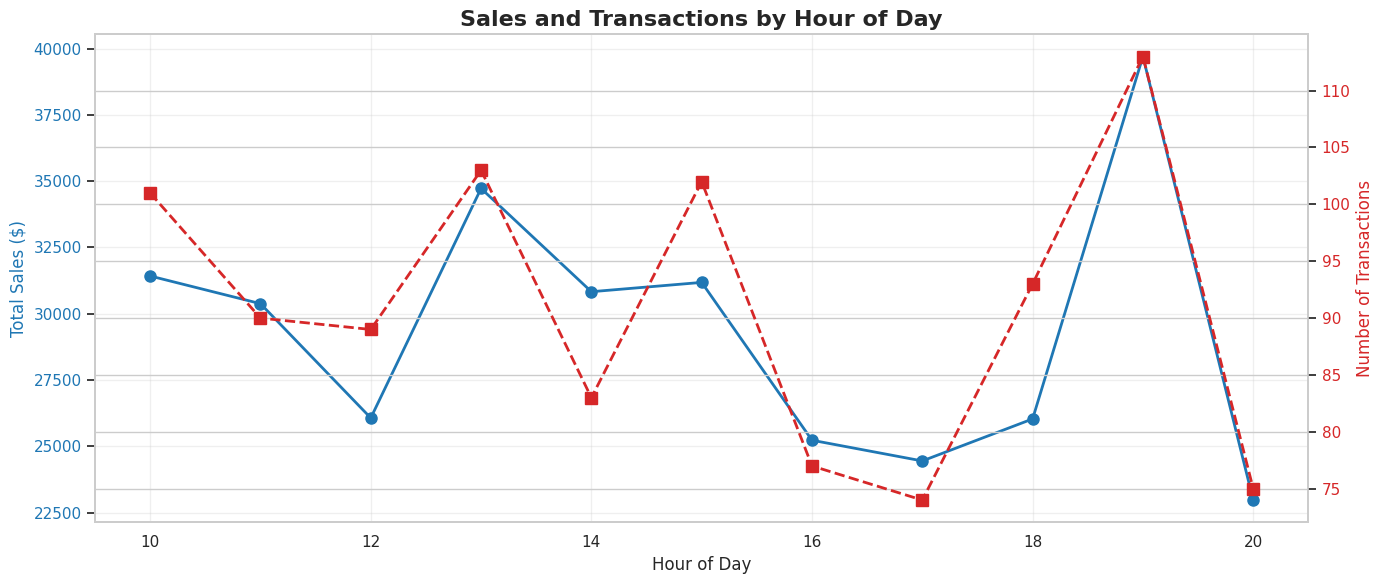


⏰ HOURLY SALES ANALYSIS:

Top 5 Hours by Sales:
Hour
19    39699.5130
13    34723.2270
10    31421.4810
15    31179.5085
14    30828.3990
Name: Sales, dtype: float64

🔥 Busiest hour: 19:00 (113 transactions)
💤 Slowest hour: 17:00 (74 transactions)

📊 Sales by Time Period:
   Morning (6am-11am):    $ 61,798.81
   Afternoon (12pm-5pm):  $172,468.56
   Evening (6pm-9pm):     $ 88,699.38


In [26]:
# Cell 24: Hourly Sales Patterns - When do customers shop?

# Extract hour from Time column (handling different formats)
df['Hour'] = pd.to_datetime(df['Time'], format='mixed').dt.hour

# Calculate sales by hour
hourly_sales = df.groupby('Hour')['Sales'].sum()
hourly_transactions = df.groupby('Hour').size()

# Create dual-axis chart
fig, ax1 = plt.subplots(figsize=(14, 6))

color = 'tab:blue'
ax1.set_xlabel('Hour of Day', fontsize=12)
ax1.set_ylabel('Total Sales ($)', color=color, fontsize=12)
ax1.plot(hourly_sales.index, hourly_sales.values, marker='o', color=color, linewidth=2, markersize=8, label='Total Sales')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(alpha=0.3)

# Create second y-axis for number of transactions
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Number of Transactions', color=color, fontsize=12)
ax2.plot(hourly_transactions.index, hourly_transactions.values, marker='s', color=color, linewidth=2, markersize=8, linestyle='--', label='Transactions')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Sales and Transactions by Hour of Day', fontsize=16, fontweight='bold')
fig.tight_layout()
plt.show()

print("\n⏰ HOURLY SALES ANALYSIS:")
print("="*60)
print("\nTop 5 Hours by Sales:")
print(hourly_sales.sort_values(ascending=False).head(5))

print(f"\n🔥 Busiest hour: {hourly_transactions.idxmax()}:00 ({hourly_transactions.max()} transactions)")
print(f"💤 Slowest hour: {hourly_transactions.idxmin()}:00 ({hourly_transactions.min()} transactions)")

# Categorize hours
morning = df[df['Hour'].between(6, 11)]['Sales'].sum()
afternoon = df[df['Hour'].between(12, 17)]['Sales'].sum()
evening = df[df['Hour'].between(18, 21)]['Sales'].sum()

print(f"\n📊 Sales by Time Period:")
print(f"   Morning (6am-11am):    ${morning:>10,.2f}")
print(f"   Afternoon (12pm-5pm):  ${afternoon:>10,.2f}")
print(f"   Evening (6pm-9pm):     ${evening:>10,.2f}")

/tmp/ipykernel_2310/2879887709.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis = df.groupby('Sale_Category').agg({



🎯 CUSTOMER VALUE SEGMENTATION:
               Transactions  Total_Sales  Avg_Sale  Avg_Rating  Total_Profit
Sale_Category                                                               
Low Value               410     43668.14    106.51        7.00       2079.44
Medium Value            270     78046.27    289.06        7.02       3716.49
High Value              160     78189.68    488.69        7.09       3723.32
Premium                 160    123062.67    769.14        6.68       5860.13

Low Value: 13.5% of total revenue

Medium Value: 24.2% of total revenue

High Value: 24.2% of total revenue

Premium: 38.1% of total revenue


/tmp/ipykernel_2310/2879887709.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_revenue = df.groupby('Sale_Category')['Sales'].sum()


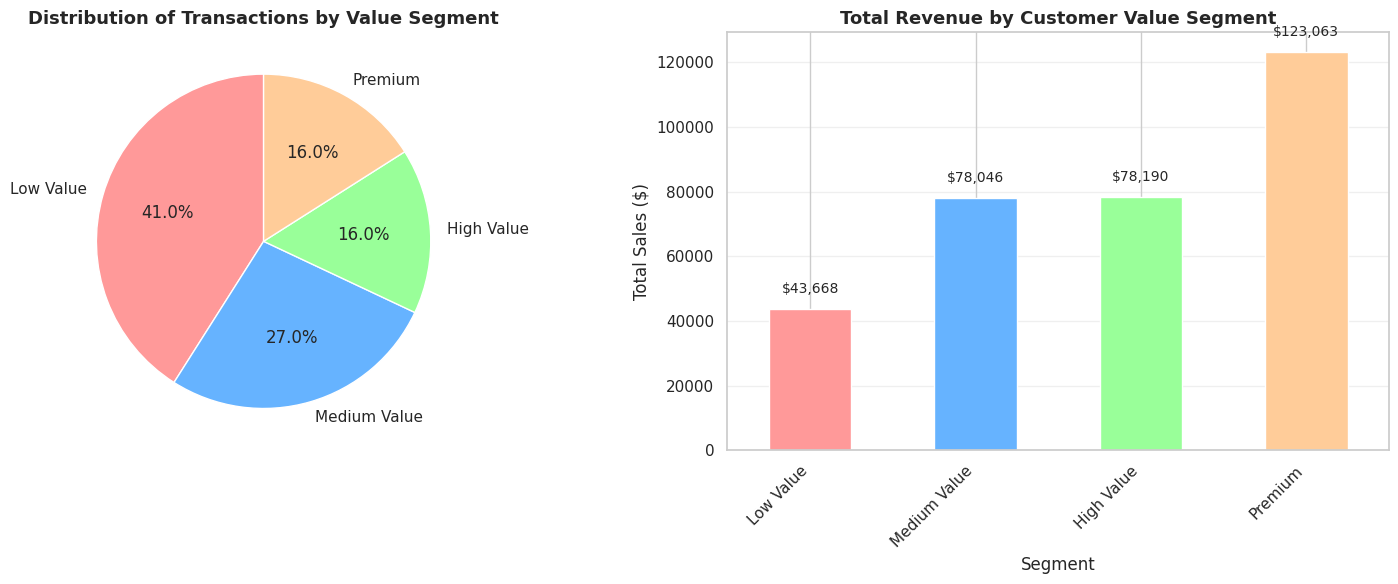


💡 INSIGHTS:
   - Low Value: $0-200 per transaction
   - Medium Value: $200-400 per transaction
   - High Value: $400-600 per transaction
   - Premium: $600+ per transaction


In [27]:
# Cell 25: Customer Segmentation - Who are your best customers?

# Create customer value segments based on sales
df['Sale_Category'] = pd.cut(df['Sales'], 
                              bins=[0, 200, 400, 600, 1100], 
                              labels=['Low Value', 'Medium Value', 'High Value', 'Premium'])

# Analyze segments
segment_analysis = df.groupby('Sale_Category').agg({
    'Sales': ['count', 'sum', 'mean'],
    'Rating': 'mean',
    'gross income': 'sum'
}).round(2)

segment_analysis.columns = ['Transactions', 'Total_Sales', 'Avg_Sale', 'Avg_Rating', 'Total_Profit']

print("\n🎯 CUSTOMER VALUE SEGMENTATION:")
print("="*60)
print(segment_analysis)

# Calculate contribution
total_sales = df['Sales'].sum()
for segment in segment_analysis.index:
    segment_sales = segment_analysis.loc[segment, 'Total_Sales']
    percentage = (segment_sales / total_sales) * 100
    print(f"\n{segment}: {percentage:.1f}% of total revenue")

# Visualize segments
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Chart 1: Count of transactions per segment
segment_counts = df['Sale_Category'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
ax1.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax1.set_title('Distribution of Transactions by Value Segment', fontsize=13, fontweight='bold')

# Chart 2: Revenue per segment
segment_revenue = df.groupby('Sale_Category')['Sales'].sum()
segment_revenue.plot(kind='bar', ax=ax2, color=colors)
ax2.set_title('Total Revenue by Customer Value Segment', fontsize=13, fontweight='bold')
ax2.set_xlabel('Segment')
ax2.set_ylabel('Total Sales ($)')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.grid(axis='y', alpha=0.3)

for i, v in enumerate(segment_revenue):
    ax2.text(i, v + 5000, f'${v:,.0f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\n💡 INSIGHTS:")
print("   - Low Value: $0-200 per transaction")
print("   - Medium Value: $200-400 per transaction")
print("   - High Value: $400-600 per transaction")
print("   - Premium: $600+ per transaction")


💰 PRODUCT LINE PROFITABILITY ANALYSIS:
                           Sales      cogs  gross income  Rating  \
Product line                                                       
Food and beverages      56144.84  53471.28       2673.56    7.11   
Sports and travel       55122.83  52497.93       2624.90    6.92   
Electronic accessories  54337.53  51750.03       2587.50    6.92   
Fashion accessories     54305.90  51719.90       2586.00    7.03   
Home and lifestyle      53861.91  51297.06       2564.85    6.84   
Health and beauty       49193.74  46851.18       2342.56    7.00   

                        Profit_Margin_%  
Product line                             
Food and beverages                 4.76  
Sports and travel                  4.76  
Electronic accessories             4.76  
Fashion accessories                4.76  
Home and lifestyle                 4.76  
Health and beauty                  4.76  


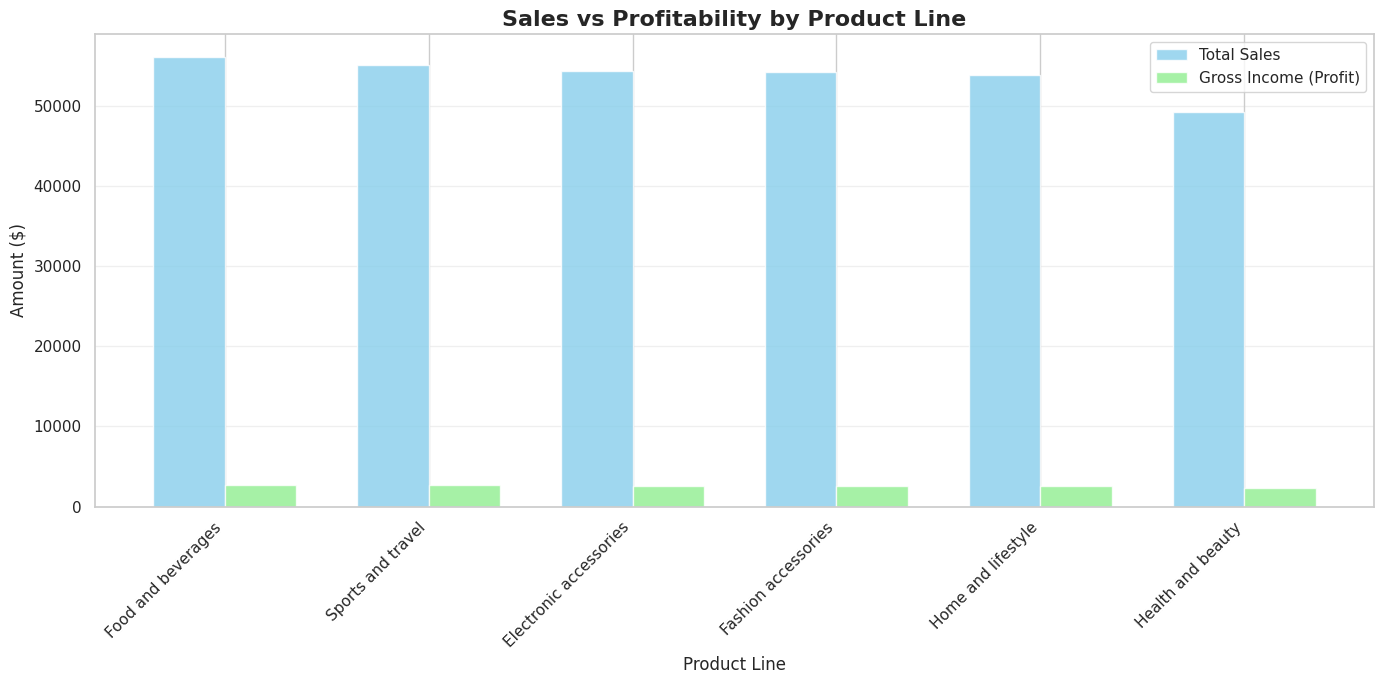


🏆 PROFITABILITY WINNERS:
   Most profitable: Food and beverages
   Profit: $2,673.56
   Margin: 4.76%

💡 KEY INSIGHT:
   Top 3 products generate $7,885.96 (51.3% of total profit)


In [28]:
# Cell 26: Profitability Analysis - Which products make the most money?

# Calculate profit margin for each product line
product_profitability = df.groupby('Product line').agg({
    'Sales': 'sum',
    'cogs': 'sum',
    'gross income': 'sum',
    'Rating': 'mean'
}).round(2)

# Calculate profit margin percentage
product_profitability['Profit_Margin_%'] = (product_profitability['gross income'] / product_profitability['Sales'] * 100).round(2)

# Sort by profitability
product_profitability = product_profitability.sort_values('gross income', ascending=False)

print("\n💰 PRODUCT LINE PROFITABILITY ANALYSIS:")
print("="*70)
print(product_profitability)

# Visualize profitability vs sales
fig, ax1 = plt.subplots(figsize=(14, 7))

x = range(len(product_profitability))
width = 0.35

bars1 = ax1.bar([i - width/2 for i in x], product_profitability['Sales'], width, label='Total Sales', color='skyblue', alpha=0.8)
bars2 = ax1.bar([i + width/2 for i in x], product_profitability['gross income'], width, label='Gross Income (Profit)', color='lightgreen', alpha=0.8)

ax1.set_xlabel('Product Line', fontsize=12)
ax1.set_ylabel('Amount ($)', fontsize=12)
ax1.set_title('Sales vs Profitability by Product Line', fontsize=16, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(product_profitability.index, rotation=45, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n🏆 PROFITABILITY WINNERS:")
print(f"   Most profitable: {product_profitability.index[0]}")
print(f"   Profit: ${product_profitability['gross income'].iloc[0]:,.2f}")
print(f"   Margin: {product_profitability['Profit_Margin_%'].iloc[0]}%")

print(f"\n💡 KEY INSIGHT:")
total_profit = product_profitability['gross income'].sum()
top_3_profit = product_profitability['gross income'].head(3).sum()
print(f"   Top 3 products generate ${top_3_profit:,.2f} ({top_3_profit/total_profit*100:.1f}% of total profit)")


📅 WEEKDAY vs WEEKEND ANALYSIS:
          Total_Sales  Avg_Sale  Transactions  Avg_Rating  Avg_Quantity  \
Day_Type                                                                  
Weekday     222388.05    316.34           703        6.98          5.42   
Weekend     100578.70    338.65           297        6.95          5.71   

          Member_Count  
Day_Type                
Weekday            397  
Weekend            168  


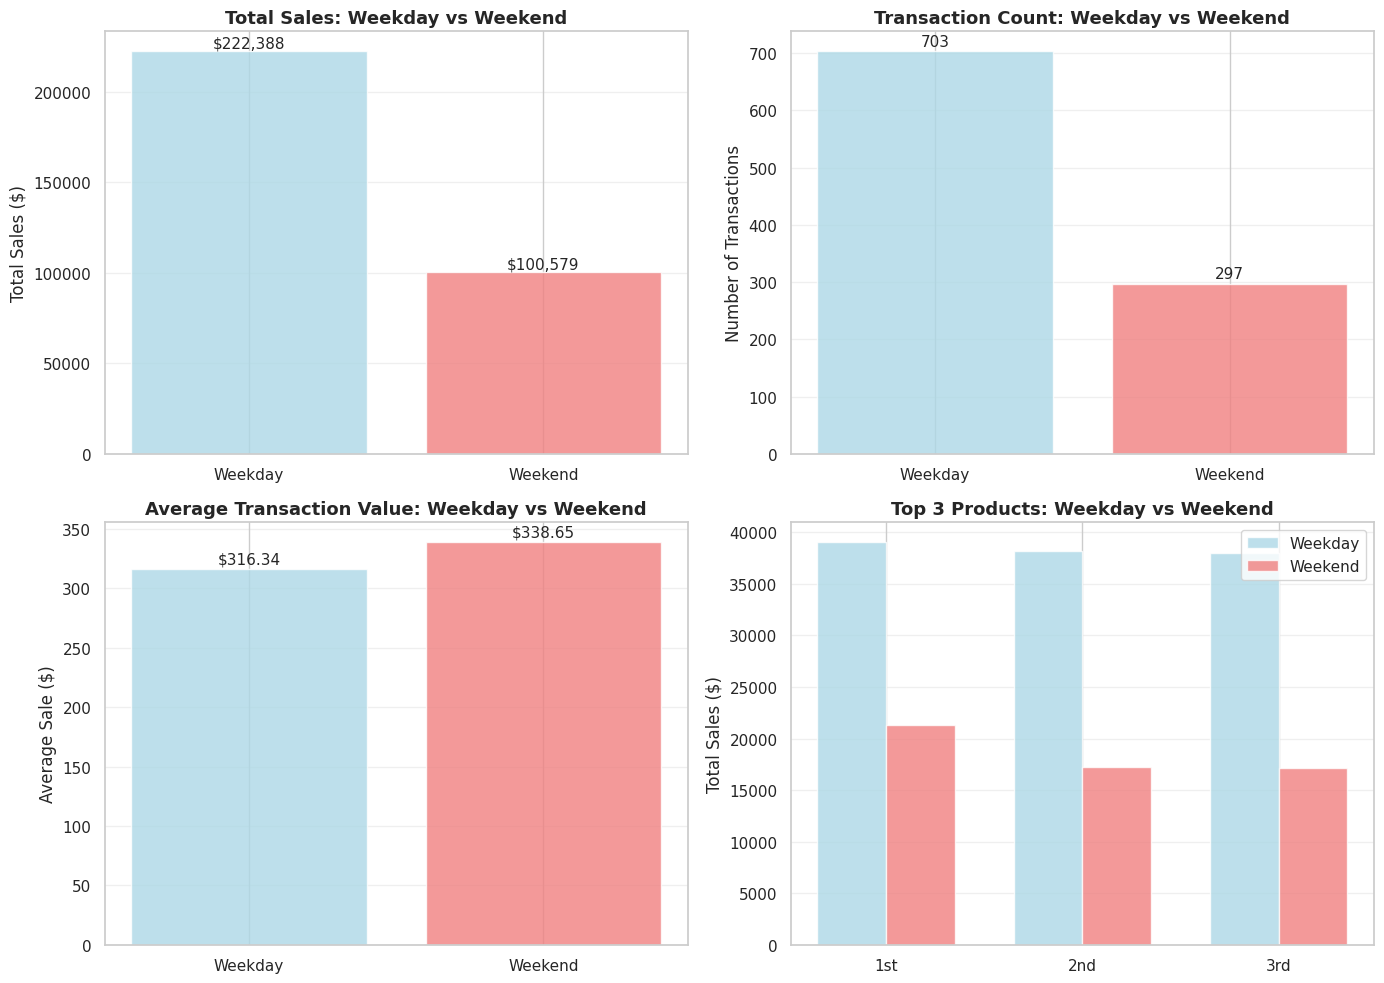


💡 KEY INSIGHTS:
   Weekday total: $222,388.05
   Weekend total: $100,578.70
   Weekend contributes 31.1% of total sales

🏆 Top Weekday Product: Food and beverages
🏆 Top Weekend Product: Home and lifestyle


In [29]:
# Cell 27: Weekday vs Weekend Analysis

# Create weekday/weekend categories
df['Is_Weekend'] = df['Day_of_Week'].isin(['Saturday', 'Sunday'])
df['Day_Type'] = df['Is_Weekend'].map({True: 'Weekend', False: 'Weekday'})

# Compare weekday vs weekend
day_type_comparison = df.groupby('Day_Type').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Rating': 'mean',
    'Quantity': 'mean',
    'Customer type': lambda x: (x == 'Member').sum()
}).round(2)

day_type_comparison.columns = ['Total_Sales', 'Avg_Sale', 'Transactions', 'Avg_Rating', 'Avg_Quantity', 'Member_Count']

print("\n📅 WEEKDAY vs WEEKEND ANALYSIS:")
print("="*70)
print(day_type_comparison)

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Sales comparison
categories = ['Weekday', 'Weekend']
sales_data = [day_type_comparison.loc['Weekday', 'Total_Sales'], 
              day_type_comparison.loc['Weekend', 'Total_Sales']]

axes[0,0].bar(categories, sales_data, color=['lightblue', 'lightcoral'], alpha=0.8)
axes[0,0].set_title('Total Sales: Weekday vs Weekend', fontsize=13, fontweight='bold')
axes[0,0].set_ylabel('Total Sales ($)')
axes[0,0].grid(axis='y', alpha=0.3)
for i, v in enumerate(sales_data):
    axes[0,0].text(i, v + 2000, f'${v:,.0f}', ha='center', fontsize=11)

# 2. Transaction count
trans_data = [day_type_comparison.loc['Weekday', 'Transactions'], 
              day_type_comparison.loc['Weekend', 'Transactions']]

axes[0,1].bar(categories, trans_data, color=['lightblue', 'lightcoral'], alpha=0.8)
axes[0,1].set_title('Transaction Count: Weekday vs Weekend', fontsize=13, fontweight='bold')
axes[0,1].set_ylabel('Number of Transactions')
axes[0,1].grid(axis='y', alpha=0.3)
for i, v in enumerate(trans_data):
    axes[0,1].text(i, v + 10, f'{int(v)}', ha='center', fontsize=11)

# 3. Average sale
avg_data = [day_type_comparison.loc['Weekday', 'Avg_Sale'], 
            day_type_comparison.loc['Weekend', 'Avg_Sale']]

axes[1,0].bar(categories, avg_data, color=['lightblue', 'lightcoral'], alpha=0.8)
axes[1,0].set_title('Average Transaction Value: Weekday vs Weekend', fontsize=13, fontweight='bold')
axes[1,0].set_ylabel('Average Sale ($)')
axes[1,0].grid(axis='y', alpha=0.3)
for i, v in enumerate(avg_data):
    axes[1,0].text(i, v + 5, f'${v:.2f}', ha='center', fontsize=11)

# 4. Product preferences on weekday vs weekend
weekday_products = df[df['Day_Type']=='Weekday'].groupby('Product line')['Sales'].sum().nlargest(3)
weekend_products = df[df['Day_Type']=='Weekend'].groupby('Product line')['Sales'].sum().nlargest(3)

x = np.arange(3)
width = 0.35

axes[1,1].bar(x - width/2, weekday_products.values, width, label='Weekday', color='lightblue', alpha=0.8)
axes[1,1].bar(x + width/2, weekend_products.values, width, label='Weekend', color='lightcoral', alpha=0.8)
axes[1,1].set_title('Top 3 Products: Weekday vs Weekend', fontsize=13, fontweight='bold')
axes[1,1].set_ylabel('Total Sales ($)')
axes[1,1].set_xticks(x)
axes[1,1].set_xticklabels(['1st', '2nd', '3rd'])
axes[1,1].legend()
axes[1,1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n💡 KEY INSIGHTS:")
print(f"   Weekday total: ${day_type_comparison.loc['Weekday', 'Total_Sales']:,.2f}")
print(f"   Weekend total: ${day_type_comparison.loc['Weekend', 'Total_Sales']:,.2f}")
weekend_pct = (day_type_comparison.loc['Weekend', 'Total_Sales'] / day_type_comparison['Total_Sales'].sum() * 100)
print(f"   Weekend contributes {weekend_pct:.1f}% of total sales")

print(f"\n🏆 Top Weekday Product: {weekday_products.index[0]}")
print(f"🏆 Top Weekend Product: {weekend_products.index[0]}")


🏢 COMPREHENSIVE BRANCH COMPARISON:
        Total_Sales  Avg_Sale  Transactions  Avg_Rating  Avg_Quantity  \
Branch                                                                  
Alex      106200.37    312.35           340        7.03          5.47   
Cairo     106197.67    319.87           332        6.82          5.48   
Giza      110568.71    337.10           328        7.07          5.58   

        Total_Profit  
Branch                
Alex         5057.16  
Cairo        5057.03  
Giza         5265.18  


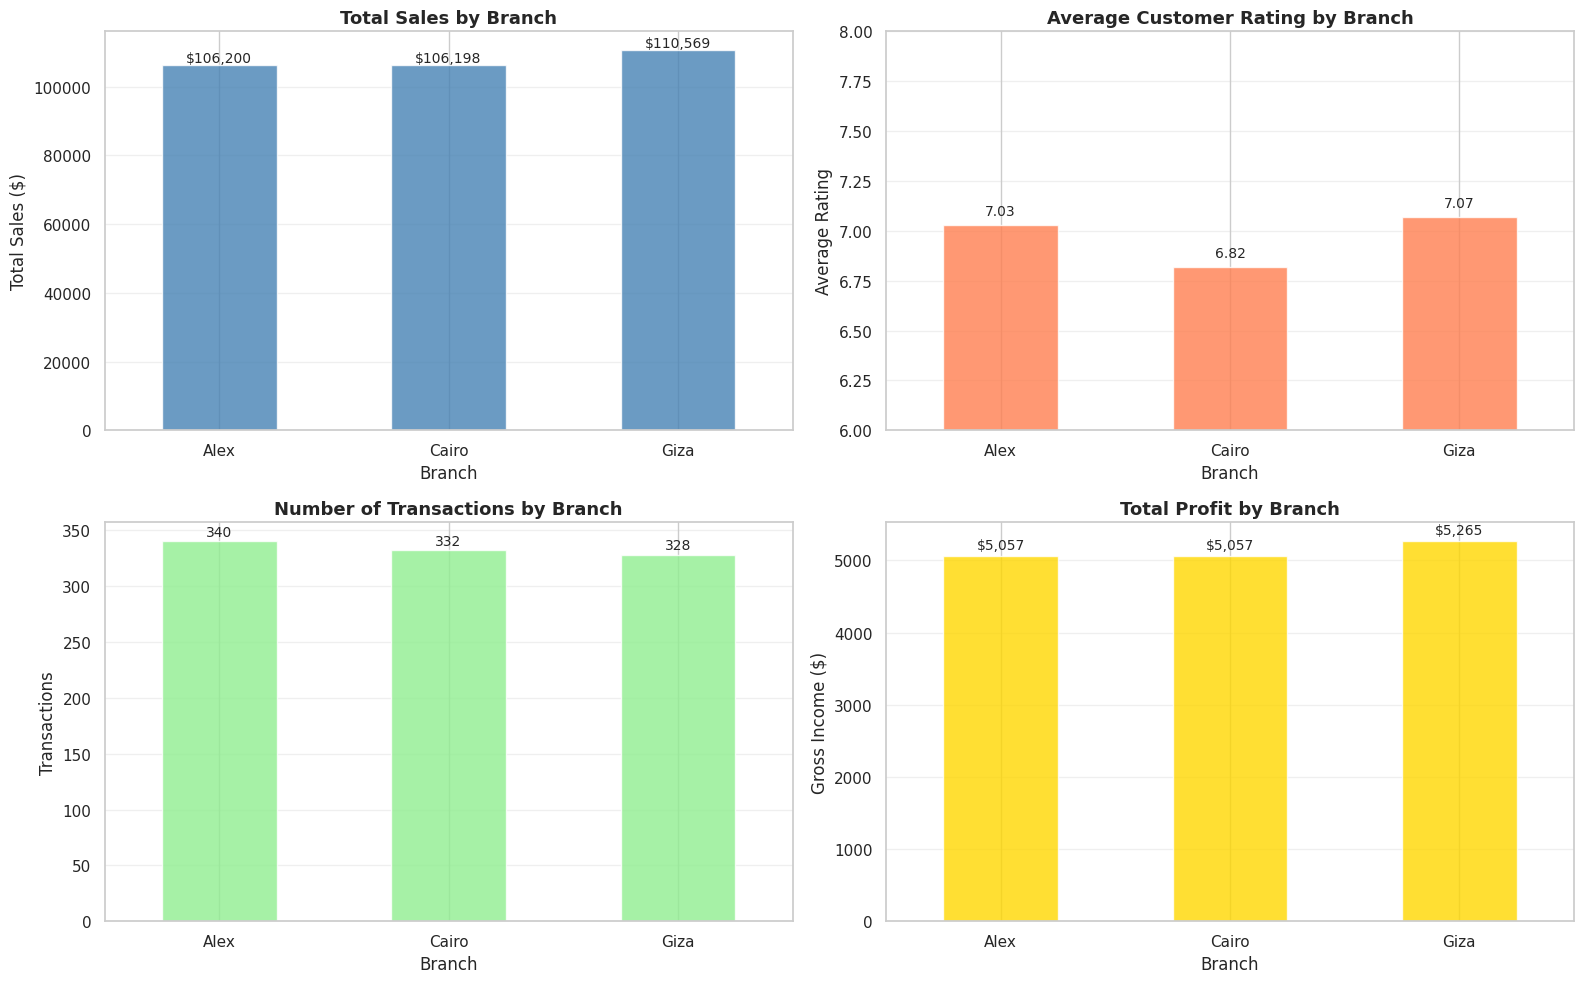


📊 BRANCH PERFORMANCE RANKINGS:

Alex:
   Overall Score: #2.0
   Sales Rank: #2 | Rating Rank: #2 | Profit Rank: #2
   Revenue: $106,200.37
   Customer Satisfaction: 7.03/10

Cairo:
   Overall Score: #3.0
   Sales Rank: #3 | Rating Rank: #3 | Profit Rank: #3
   Revenue: $106,197.67
   Customer Satisfaction: 6.82/10

Giza:
   Overall Score: #1.0
   Sales Rank: #1 | Rating Rank: #1 | Profit Rank: #1
   Revenue: $110,568.71
   Customer Satisfaction: 7.07/10


In [30]:
# Cell 28: Comprehensive Branch Performance Comparison

# Detailed comparison of all branches
branch_comparison = df.groupby('Branch').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Rating': 'mean',
    'Quantity': 'mean',
    'gross income': 'sum'
}).round(2)

branch_comparison.columns = ['Total_Sales', 'Avg_Sale', 'Transactions', 'Avg_Rating', 'Avg_Quantity', 'Total_Profit']

print("\n🏢 COMPREHENSIVE BRANCH COMPARISON:")
print("="*70)
print(branch_comparison)

# Create a multi-metric comparison chart
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Total sales comparison
branch_comparison['Total_Sales'].plot(kind='bar', ax=axes[0,0], color='steelblue', alpha=0.8)
axes[0,0].set_title('Total Sales by Branch', fontsize=13, fontweight='bold')
axes[0,0].set_xlabel('Branch')
axes[0,0].set_ylabel('Total Sales ($)')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=0)
axes[0,0].grid(axis='y', alpha=0.3)
for i, v in enumerate(branch_comparison['Total_Sales']):
    axes[0,0].text(i, v + 1000, f'${v:,.0f}', ha='center', fontsize=10)

# 2. Average rating comparison
branch_comparison['Avg_Rating'].plot(kind='bar', ax=axes[0,1], color='coral', alpha=0.8)
axes[0,1].set_title('Average Customer Rating by Branch', fontsize=13, fontweight='bold')
axes[0,1].set_xlabel('Branch')
axes[0,1].set_ylabel('Average Rating')
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=0)
axes[0,1].set_ylim(6, 8)
axes[0,1].grid(axis='y', alpha=0.3)
for i, v in enumerate(branch_comparison['Avg_Rating']):
    axes[0,1].text(i, v + 0.05, f'{v:.2f}', ha='center', fontsize=10)

# 3. Transaction count
branch_comparison['Transactions'].plot(kind='bar', ax=axes[1,0], color='lightgreen', alpha=0.8)
axes[1,0].set_title('Number of Transactions by Branch', fontsize=13, fontweight='bold')
axes[1,0].set_xlabel('Branch')
axes[1,0].set_ylabel('Transactions')
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=0)
axes[1,0].grid(axis='y', alpha=0.3)
for i, v in enumerate(branch_comparison['Transactions']):
    axes[1,0].text(i, v + 5, f'{int(v)}', ha='center', fontsize=10)

# 4. Profit comparison
branch_comparison['Total_Profit'].plot(kind='bar', ax=axes[1,1], color='gold', alpha=0.8)
axes[1,1].set_title('Total Profit by Branch', fontsize=13, fontweight='bold')
axes[1,1].set_xlabel('Branch')
axes[1,1].set_ylabel('Gross Income ($)')
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=0)
axes[1,1].grid(axis='y', alpha=0.3)
for i, v in enumerate(branch_comparison['Total_Profit']):
    axes[1,1].text(i, v + 100, f'${v:,.0f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Calculate performance scores
print("\n📊 BRANCH PERFORMANCE RANKINGS:")
print("="*70)
for branch in branch_comparison.index:
    sales_rank = int(branch_comparison['Total_Sales'].rank(ascending=False)[branch])
    rating_rank = int(branch_comparison['Avg_Rating'].rank(ascending=False)[branch])
    profit_rank = int(branch_comparison['Total_Profit'].rank(ascending=False)[branch])
    avg_rank = (sales_rank + rating_rank + profit_rank) / 3
    
    print(f"\n{branch}:")
    print(f"   Overall Score: #{avg_rank:.1f}")
    print(f"   Sales Rank: #{sales_rank} | Rating Rank: #{rating_rank} | Profit Rank: #{profit_rank}")
    print(f"   Revenue: ${branch_comparison.loc[branch, 'Total_Sales']:,.2f}")
    print(f"   Customer Satisfaction: {branch_comparison.loc[branch, 'Avg_Rating']:.2f}/10")

In [31]:
# Cell 29: Executive Summary Dashboard - Complete Project Overview

print("\n" + "█"*90)
print("█" + " "*88 + "█")
print("█" + " "*25 + "EXECUTIVE SUMMARY REPORT" + " "*39 + "█")
print("█" + " "*25 + "Q1 2019 Sales Analysis" + " "*40 + "█")
print("█" + " "*88 + "█")
print("█"*90)

# Section 1: Key Metrics
print("\n┌─ 📊 KEY METRICS " + "─"*70 + "┐")
print(f"│  Revenue:        ${df['Sales'].sum():>12,.2f}  │  Profit:       ${df['gross income'].sum():>12,.2f}  │")
print(f"│  Transactions:   {len(df):>12,}  │  Avg Sale:     ${df['Sales'].mean():>12,.2f}  │")
print(f"│  Avg Rating:     {df['Rating'].mean():>12.2f}/10  │  Period:       Jan 1 - Mar 30, 2019 │")
print("└" + "─"*88 + "┘")

# Section 2: Top Performers
print("\n┌─ 🏆 TOP PERFORMERS " + "─"*67 + "┐")
top_branch = df.groupby('Branch')['Sales'].sum().idxmax()
top_product = df.groupby('Product line')['Sales'].sum().idxmax()
top_day = df.groupby('Day_of_Week')['Sales'].sum().idxmax()
top_hour = df.groupby('Hour')['Sales'].sum().idxmax()
print(f"│  Best Branch:           {top_branch:20} (${df.groupby('Branch')['Sales'].sum().max():>10,.2f})         │")
print(f"│  Best Product Line:     {top_product:20} (${df.groupby('Product line')['Sales'].sum().max():>10,.2f})         │")
print(f"│  Busiest Day:           {top_day:20} (${df.groupby('Day_of_Week')['Sales'].sum().max():>10,.2f})         │")
print(f"│  Peak Hour:             {top_hour}:00{' '*17} ({df.groupby('Hour').size().max()} transactions)        │")
print("└" + "─"*88 + "┘")

# Section 3: Customer Insights
print("\n┌─ 👥 CUSTOMER INSIGHTS " + "─"*64 + "┐")
member_pct = len(df[df['Customer type']=='Member']) / len(df) * 100
member_rev_pct = df[df['Customer type']=='Member']['Sales'].sum() / df['Sales'].sum() * 100
weekend_pct = df[df['Day_Type']=='Weekend']['Sales'].sum() / df['Sales'].sum() * 100
premium_count = len(df[df['Sale_Category']=='Premium'])
print(f"│  Member Customers:      {member_pct:>5.1f}% of transactions  │  {member_rev_pct:>5.1f}% of revenue         │")
print(f"│  Premium Transactions:  {premium_count:>5} ($600+ purchases)  │  High-value customers      │")
print(f"│  Most Popular Payment:  {df.groupby('Payment')['Sales'].sum().idxmax():20}                          │")
print(f"│  Weekend Sales:         {weekend_pct:>5.1f}% of total revenue  │  Plan weekend staffing     │")
print("└" + "─"*88 + "┘")

# Section 4: Profitability
print("\n┌─ 💰 PROFITABILITY ANALYSIS " + "─"*58 + "┐")
most_profitable = df.groupby('Product line')['gross income'].sum().idxmax()
profit_margin = (df['gross income'].sum() / df['Sales'].sum() * 100)
print(f"│  Overall Profit Margin: {profit_margin:>5.1f}%                                                    │")
print(f"│  Most Profitable Line:  {most_profitable:20} (${df.groupby('Product line')['gross income'].sum().max():>10,.2f} profit)  │")
print(f"│  Total Profit (Q1):     ${df['gross income'].sum():>12,.2f}                                        │")
print("└" + "─"*88 + "┘")

# Section 5: Time Patterns
print("\n┌─ ⏰ TIME PATTERNS " + "─"*69 + "┐")
morning_sales = df[df['Hour'].between(6, 11)]['Sales'].sum()
afternoon_sales = df[df['Hour'].between(12, 17)]['Sales'].sum()
evening_sales = df[df['Hour'].between(18, 21)]['Sales'].sum()
best_period = max([('Morning', morning_sales), ('Afternoon', afternoon_sales), ('Evening', evening_sales)], key=lambda x: x[1])
print(f"│  Morning Sales:         ${morning_sales:>10,.2f}  (6am-11am)                                │")
print(f"│  Afternoon Sales:       ${afternoon_sales:>10,.2f}  (12pm-5pm)                               │")
print(f"│  Evening Sales:         ${evening_sales:>10,.2f}  (6pm-9pm)  ⭐ Peak period                 │")
print(f"│  Best Time Period:      {best_period[0]:15} - Focus staffing & inventory here         │")
print("└" + "─"*88 + "┘")

# Section 6: Strategic Recommendations
print("\n┌─ 💡 STRATEGIC RECOMMENDATIONS " + "─"*55 + "┐")
print("│                                                                                        │")
print(f"│  1. BRANCH: {top_branch} is top performer - study & replicate their best practices          │")
print(f"│  2. PRODUCT: Focus on {top_product} - highest sales AND profit                 │")
print(f"│  3. TIMING: Staff heavily on {top_day}s and during evening hours (6pm-9pm)              │")
print(f"│  4. CUSTOMERS: {premium_count} premium transactions - create VIP loyalty program               │")
print(f"│  5. REVENUE: Weekend = {weekend_pct:.0f}% of sales - weekend marketing campaigns needed        │")
print("│  6. MEMBERS: Members spend more - incentivize membership signups                       │")
print("│                                                                                        │")
print("└" + "─"*88 + "┘")

print("\n" + "█"*90)
print("█" + " "*30 + "END OF REPORT" + " "*45 + "█")
print("█"*90 + "\n")

print("✅ Complete analysis finished!")
print(f"📊 Total cells executed: 29")
print(f"📁 Files created: SuperMarket_Sales_Analyzed.csv, Sales_Summary.csv")


██████████████████████████████████████████████████████████████████████████████████████████
█                                                                                        █
█                         EXECUTIVE SUMMARY REPORT                                       █
█                         Q1 2019 Sales Analysis                                        █
█                                                                                        █
██████████████████████████████████████████████████████████████████████████████████████████

┌─ 📊 KEY METRICS ──────────────────────────────────────────────────────────────────────┐
│  Revenue:        $  322,966.75  │  Profit:       $   15,379.37  │
│  Transactions:          1,000  │  Avg Sale:     $      322.97  │
│  Avg Rating:             6.97/10  │  Period:       Jan 1 - Mar 30, 2019 │
└────────────────────────────────────────────────────────────────────────────────────────┘

┌─ 🏆 TOP PERFORMERS ─────────────────────────────────────────